In [20]:
%load_ext autoreload
%autoreload 2

In [24]:
import os
import re
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

from analyze import *

In [25]:
tasks = ["redis_ycsb", "wrk", "hadoop", "linpack"]
path = "data/1all_limitless" 
s1 = ExperimentSeries(path, tasks)
path = "data/2more_tasks" 
s2 = ExperimentSeries(path, tasks)
path = "data/3more_tasks_hadoop" 
s3 = ExperimentSeries(path, tasks, {"hadoopslave": 2})
path = "data/4dosa" 
s4 = ExperimentSeries(path, tasks, {"hadoopslave": 2})

Found 16 experiment in series 1all_limitless
Missing record for linpack wrk
Found 15 experiment in series 2more_tasks
Missing record for wrk wrk
Missing record for hadoop redis_ycsb
Missing record for hadoop wrk
Missing record for linpack wrk
Found 12 experiment in series 3more_tasks_hadoop
Found 16 experiment in series 4dosa


Missing record for linpack wrk
Found 15 experiment in series 2more_tasks
perf vs cpu data/2more_tasks
Getting cpu data
Aggregating cpu data
Getting perf data
Aggregating perf data


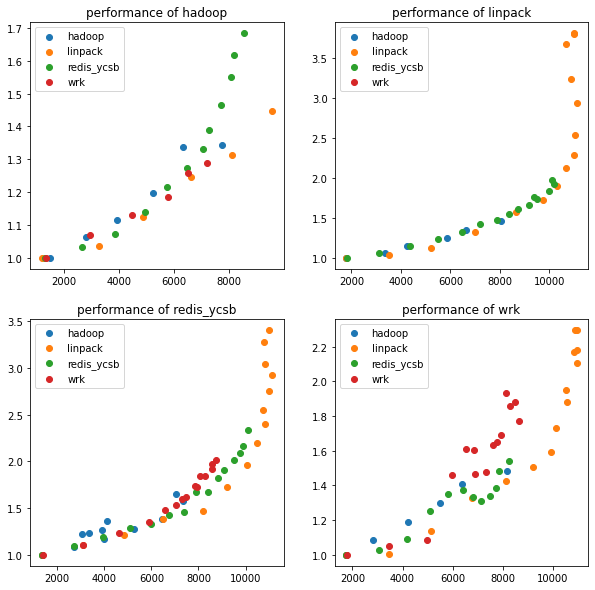

In [22]:
tasks = ["redis_ycsb", "wrk", "hadoop", "linpack"]
path = "data/2more_tasks" 
s2 = ExperimentSeries(path, tasks)
res_s2 = analyzePerfVsCpu(s2)
printPerfVsCpu(res_s2["perf_vs_cpu"])

In [57]:
basepath = "/home/pawel/studia_local/k8s/codes/cbtool/myscripts/data"
path = os.path.join(basepath, "3more_tasks_hadoop")

#print(path)
#glob.glob(f"{path}/*")
tasks = ["redis_ycsb", "wrk", "hadoop", "linpack"]
s3 = ExperimentSeries(path, tasks, {"hadoopslave": 2})
#res_s3 = analyzePerfVsCpu(s3)
#analyzeInterferenceGrid([s3], [res_s3["perf_vs_cpu"]])
#printPerfVsCpu(res_s3["perf_vs_cpu"])
#res_s2 = analyzePerfVsCpu(s2)

Missing record for wrk wrk
Missing record for hadoop redis_ycsb
Missing record for hadoop wrk
Missing record for linpack wrk
Found 12 experiment in series 3more_tasks_hadoop


In [61]:
tasks = ["redis_ycsb", "wrk", "hadoop", "linpack"]
path = "data/6cpu_diff" 
s6 = ExperimentSeries(path, tasks, {"hadoopslave": 2})
cpu = getCpuData(s6)
res_s6 = analyzePerfVsCpu(s6, False)

Missing record for redis_ycsb redis_ycsb
Missing record for redis_ycsb wrk
Missing record for redis_ycsb hadoop
Missing record for redis_ycsb linpack
Missing record for wrk redis_ycsb
Missing record for wrk hadoop
Missing record for hadoop wrk
Missing record for hadoop hadoop
Missing record for linpack redis_ycsb
Missing record for linpack wrk
Missing record for linpack hadoop
Missing record for linpack linpack
Found 4 experiment in series 6cpu_diff
Getting cpu data
perf vs cpu data/6cpu_diff
Getting cpu data
Aggregating cpu data
Getting perf data
Aggregating perf data


ValueError: Performance aggregation failed: no datapoints for 428hadoop_redis_ycsb ai_no=1 tasks=9 metric=app_latency

Missing record for unixbench filebench
Missing record for unixbench netperf
Found 7 experiment in series 5synthetic


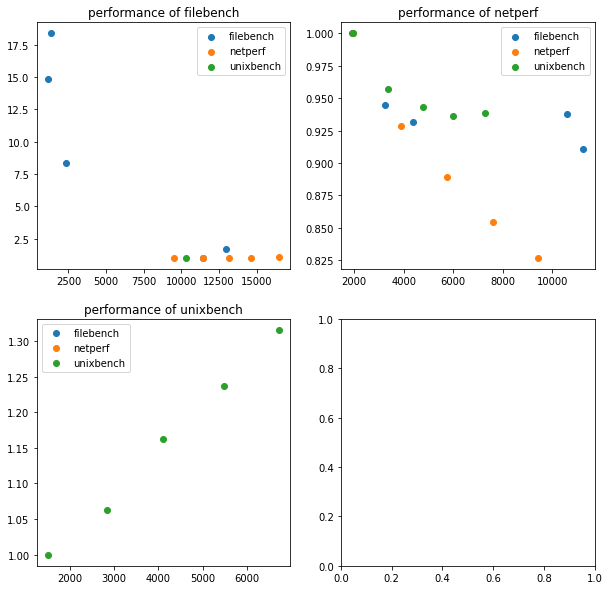

In [29]:
tasks = ["filebench", "netperf", "unixbench"]
path = "data/5synthetic" 
s5 = ExperimentSeries(path, tasks)
#res_s5 = analyzePerfVsCpu(s5)
printPerfVsCpu(s5, res_s5["perf_vs_cpu"])


In [41]:
df = res_s5["perf_vs_cpu"]
pd.set_option("display.max_columns", 30)
#cols = ["t1", "t2", "tasks"]
#cols += [c for c in df.columns if ("throughput" in c) or ("cpu" in c)]
df.loc[(df["t1"] == "filebench") & (df["ai_no"] == 1), :]

,expid,t1,t2,tasks,avg_cpu,std_cpu,cpu_samples_count,ai_no,avg_throughput,std_throughput,throughput_samples_count,throughput_quantile25,throughput_quantile50,throughput_quantile75,avg_bandwidth,std_bandwidth,bandwidth_samples_count,bandwidth_quantile25,bandwidth_quantile50,bandwidth_quantile75,avg_throughput_rescaled,std_throughput_rescaled,avg_bandwidth_rescaled,std_bandwidth_rescaled
0,500filebench,filebench,filebench,1,11470.727273,1970.872352,22,1,201693.665625,8682.401058,16.0,196578.22575,199446.5685,203334.61500,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.043047,NaN,NaN
1,500filebench,filebench,filebench,2,12964.461538,6273.781474,52,1,118669.111368,35065.386996,19.0,120204.80400,126320.1450,138698.93350,NaN,NaN,NaN,NaN,NaN,NaN,0.588363,0.173855,NaN,NaN
3,500filebench,filebench,filebench,3,2362.242063,2588.759453,83,1,24202.418917,5783.831098,12.0,20055.09900,21101.9580,27373.48600,NaN,NaN,NaN,NaN,NaN,NaN,0.119996,0.028676,NaN,NaN
6,500filebench,filebench,filebench,4,1151.310084,1620.884544,137,1,13607.200273,7112.411229,11.0,11448.46800,12365.8710,15041.28900,NaN,NaN,NaN,NaN,NaN,NaN,0.067465,0.035263,NaN,NaN
10,500filebench,filebench,filebench,5,1336.287500,2348.810708,76,1,10984.617500,8659.191739,4.0,5630.11675,8325.0910,13679.59175,NaN,NaN,NaN,NaN,NaN,NaN,0.054462,0.042932,NaN,NaN
15,501filebench_netperf,filebench,netperf,1,9492.478261,2299.516033,23,1,192326.479824,9504.110579,17.0,194578.35700,195663.3370,196271.01800,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.049417,NaN,NaN
16,501filebench_netperf,filebench,netperf,2,11448.887352,1801.493072,68,1,189939.441875,7417.699177,16.0,190304.29450,192630.9935,193103.68875,NaN,NaN,NaN,NaN,NaN,NaN,0.987589,0.038568,NaN,NaN
18,501filebench_netperf,filebench,netperf,3,13156.130435,1519.268635,116,1,189470.608412,5802.787007,17.0,189229.05700,192487.0310,193187.54400,NaN,NaN,NaN,NaN,NaN,NaN,0.985151,0.030172,NaN,NaN
21,501filebench_netperf,filebench,netperf,4,14646.506258,1940.796685,160,1,185278.031111,9789.710885,18.0,179854.51425,189971.4600,192063.34800,NaN,NaN,NaN,NaN,NaN,NaN,0.963352,0.050902,NaN,NaN
25,501filebench_netperf,filebench,netperf,5,16470.964912,2223.041009,165,1,178678.375077,11868.604443,13.0,168647.16100,176326.7280,192136.82900,NaN,NaN,NaN,NaN,NaN,NaN,0.929037,0.061711,NaN,NaN


In [1]:
data = res_s5["perf_vs_cpu"]
#printPerfVsCpu(res_s5["perf_vs_cpu"])
analyzeInterferenceGrid([s5], [res_s5["perf_vs_cpu"]])
#rescalePerfVsCpu(s5, data)
data.loc[(data["t1"] == "netperf") & (data["ai_no"] == 1), :]

NameError: name 'res_s5' is not defined

In [26]:
df = res["perf_agg"]
pd.set_option("display.max_columns", 100)

t1 = "redis_ycsb"
t2 = "hadoop"
expid = s2.getExperiment(t1, t2)
# (df["t1"] == t1) & (df["t2"] == t2)
df = df.loc[(df["ai_no"] == 1) & (df["expid"] == expid.expid)]
df

,expid,ai_no,tasks,avg_latency,std_latency,latency_samples_count,latency_quantile25,latency_quantile50,latency_quantile75,avg_throughput,std_throughput,throughput_samples_count,throughput_quantile25,throughput_quantile50,throughput_quantile75
240,172redis_ycsb_hadoop,1,1,0.083763,0.009473,239.0,0.079715,0.081131,0.083233,9380.976436,670.107420,239.0,9324.011351,9596.928983,9746.588694
241,172redis_ycsb_hadoop,1,2,0.090439,0.009334,208.0,0.085789,0.088241,0.092573,8689.135125,656.141740,208.0,8403.361345,8810.579527,9092.977087
242,172redis_ycsb_hadoop,1,3,0.097988,0.010672,191.0,0.092221,0.095975,0.101293,8031.993132,661.877710,191.0,7760.991576,8110.300081,8456.673227
243,172redis_ycsb_hadoop,1,4,0.106696,0.012405,177.0,0.099558,0.105427,0.110137,7394.888001,711.487497,177.0,7067.137809,7401.924500,7836.990596
244,172redis_ycsb_hadoop,1,5,0.115767,0.015455,170.0,0.105510,0.113426,0.122200,6828.328419,773.782088,170.0,6346.184836,6870.492051,7369.304333
245,172redis_ycsb_hadoop,1,6,0.131964,0.032286,165.0,0.117618,0.126710,0.139990,6041.580967,928.914753,165.0,5470.459519,6119.951040,6570.302234
246,172redis_ycsb_hadoop,1,7,0.137914,0.026500,176.0,0.121462,0.138966,0.156024,5843.439782,1223.760345,176.0,4989.397763,5538.632383,6344.523350
247,172redis_ycsb_hadoop,1,8,0.114031,0.032568,226.0,0.089090,0.101312,0.137507,7033.777315,1794.715442,226.0,5458.593694,7382.919810,8644.921197
248,172redis_ycsb_hadoop,1,9,0.103031,0.016438,190.0,0.095544,0.101544,0.107770,7573.036328,1028.103583,190.0,7202.019368,7624.858142,8136.712636
249,172redis_ycsb_hadoop,1,10,0.105811,0.019998,322.0,0.093001,0.102915,0.117781,7311.269396,1389.540195,322.0,6541.292430,7457.121551,8293.602814


# Performance vs cpu

101redis_ycsb
320redis_ycsb
102redis_ycsb_wrk
172redis_ycsb_hadoop
202redis_ycsb_hadoop
103redis_ycsb_linpack
323redis_ycsb_linpack
174wrk_redis_ycsb
304wrk_redis_ycsb
106wrk
108wrk_hadoop
306wrk_hadoop
107wrk_linpack
307wrk_linpack
178hadoop_redis_ycsb
114hadoop_wrk
116hadoop
230hadoop
115hadoop_linpack
271hadoop_linpack
109linpack_redis_ycsb
332linpack_redis_ycsb
112linpack_hadoop
214linpack_hadoop
111linpack
335linpack


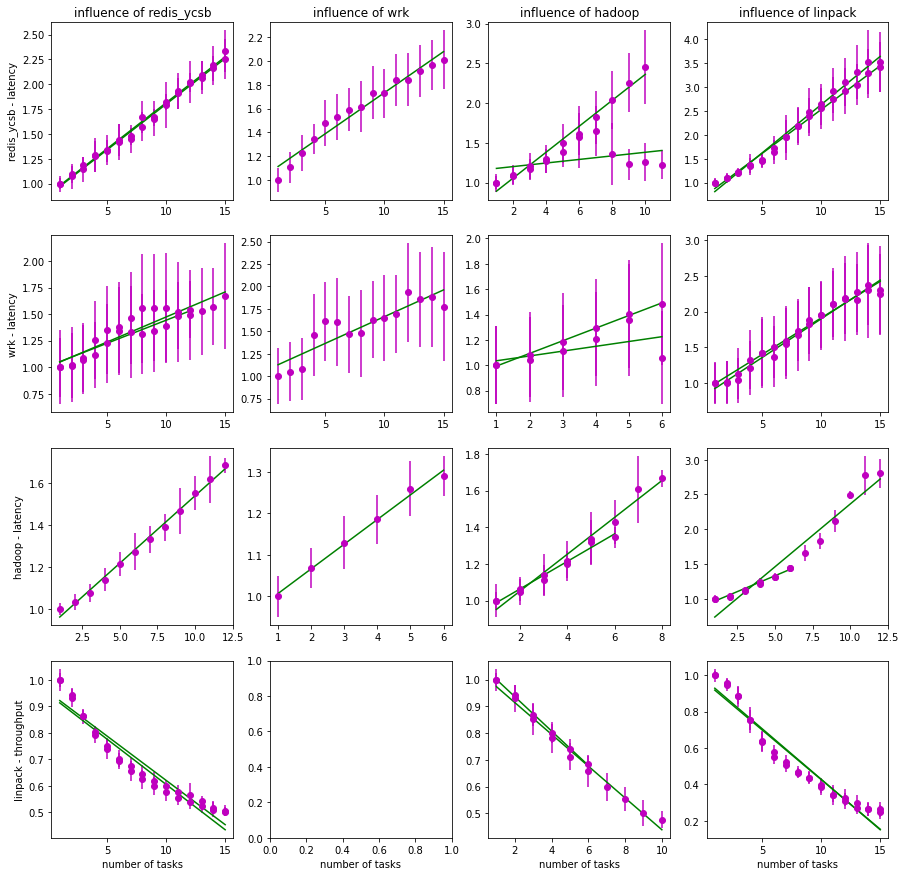

array([[[0.09251838, 0.06896643, 0.02253664, 0.18303585],
        [0.04346423, 0.05950165, 0.0996998 , 0.10239049],
        [0.06407131, 0.05943509, 0.07495003, 0.0910561 ],
        [0.03340253, 0.        , 0.06426189, 0.05550344]],

       [[0.09202281, 0.        , 0.16339007, 0.20164456],
        [0.04721765, 0.        , 0.03799307, 0.10846218],
        [0.        , 0.        , 0.10029655, 0.18047888],
        [0.03414553, 0.        , 0.05947115, 0.05454094]]])

In [53]:
analyzeInterferenceGrid([s2, s3], [res_s2["perf_vs_cpu"], res_s3["perf_vs_cpu"]])

In [28]:
data = res_s2["perf_vs_cpu"]
print("Fitting cpu per type")

def getMSEForData(xs, ys):
    reg = linear_model.LinearRegression()
    reg.fit(xs, ys)
    error = mean_squared_error(ys, reg.predict(xs))
    return error, xs.size

# Regression level = all, t1, t1, t2
def computeMSE(df, x_label, regression_level, cpu_limit=None):
    if regression_level not in ["all", "t1", "t2"]:
        raise ValueError(f"Unsupported value of regression level {regression_level}")
    errors_and_weights = []
    t1s = df["t1"].unique() if regression_level in ["t1", "t2"] else [None]
    for t1 in t1s:
        t2s = df.loc[df["t1"] == t1, "t2"].unique() if regression_level == "t2" else [None]
        for t2 in t2s:
            xs, ys, _ = getTrainingData(df, t1, t2, x_label, \
                inverse_throughput_y=True, cpu_limit=cpu_limit)
            errors_and_weights.append(getMSEForData(xs, ys))
    errors, weights = zip(*errors_and_weights)
    return np.average(errors, weights=weights)
            
limits = [10000., 12000.]
regression_levels = ["all", "t1", "t2"]
x_labels = ["avg_cpu", "avg_cpu", "tasks"]
results = np.zeros((len(limits), len(regression_levels)))
for i, limit in enumerate(limits):
    for j, regression_level in enumerate(regression_levels):
        results[i, j] = computeMSE(data, x_labels[j], regression_level, limit)
print(results)

Fitting cpu per type
[[0.01795137 0.0109526  0.00530569]
 [0.11150314 0.0871866  0.00686143]]


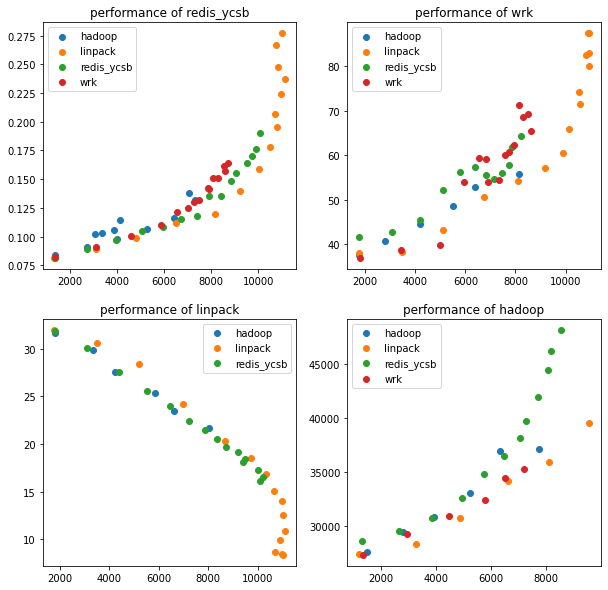

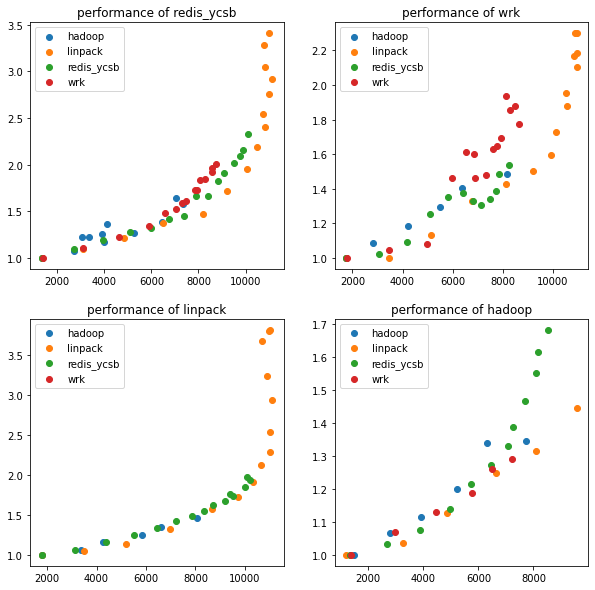

In [34]:
printPerfVsCpu(data)
printPerfVsCpu2(data)

# Performance vs number of tasks

In [17]:
tasks = ["redis_ycsb", "wrk", "hadoop", "linpack"]
path = "data/3more_tasks_hadoop" 
s3 = ExperimentSeries(path, tasks, {"hadoopslave": 2})
s3_cpu_vs_perf = analyzePerfVsCpu(s3)

analyzeInterferenceGrid(s3, s3_cpu_vs_perf["perf_vs_cpu"])

Missing record for wrk wrk
Missing record for hadoop redis_ycsb
Missing record for hadoop wrk
Missing record for linpack wrk
Found 12 experiment in series 3more_tasks_hadoop
perf vs cpu data/3more_tasks_hadoop
Getting cpu data
Aggregating cpu data
Getting perf data
Aggregating perf data


TypeError: 'ExperimentSeries' object does not support indexing

In [95]:
result = {}
for t in s2.tasks:
    expid = s2.getExperiment(t, t)
    print(expid.expid)
    result[expid.expid] = readExp(expid)
print(result.keys())

completion_time = []
for expid, df in result.items():
    print(expid)
    c = df.loc[df["ai_name"] == "ai_1" , "app_completion_time"].mean()
    completion_time.append(c)
print(completion_time)
    
#print(result.keys())
#for expid, r in result.items():
#    r2 = r.loc[r["ai_name"] == "ai_1", "app_completion_time"]
#    print(expid)
#    print(r2.describe())

101redis_ycsb
106wrk
116hadoop
111linpack
dict_keys(['101redis_ycsb', '106wrk', '116hadoop', '111linpack'])
101redis_ycsb
106wrk
116hadoop
111linpack
[1.8918032786885246, 1.4427906976744187, 44.79381443298969, 17.24773413897281]
